# Lab Assignment Two: Exploring Image Data

Arely Alcantara, Emily Fashenpour

## 1. Business Understanding

With the constant rise of technologies, and new personal recognition techniques - most corporations are leaning into using facial detection and recognition. Apple has incorporated face ID instead of touch ID, so that a user is clearly aware and willing to unlock their phone. Other companies are steering away from ID badges and instead are using face detection for building access, and other tasks that used to require ID swiping. Therefore, we believe that it is necessary that these machine learning and artificial intelligence models work appropriately as to avoid impersonation by others that sometimes lead to identity theft, privacy concerns, among others concerns.

The dataset we selected to analyze is made up of real and fake images - where real images are unedited, raw pictures of a human face, while the 'fake' images are edited, altered images of a human face with a different nose, or different eye color, etc. There is a total of 2,041 pictures in the entire dataset. We want to predict if an image is real or altered - as well as see how accurate the model is in detecting that.

A third party that might be interested in this would be Instagram as spam accounts are usually created, and this model would help against that and only have original and 'verified' or real users.

Dataset URL: https://www.kaggle.com/ciplab/real-and-fake-face-detection

Prediction task: real or fake image of a human face? With what degree of accuracy can we say that?|

## 2. Data Preparation

In [34]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os, sys
import cv2

real = os.listdir('real/')
fake = os.listdir('fake/')

print('Working with {0} images of real faces'.format(len(real)))
print('Working with {0} images of fake/edited faces'.format(len(fake)))
print('Working with a total of {0} faces'.format(len(real) + len(fake)))

images = []
labels = []

for image_path in real:
    img = cv2.imread('real/' + image_path, 0)
    img = cv2.resize(img, (250, 250))
    img_size = img.shape
    img = img.flatten()
    images.append(img)
    labels.append(0)
    
for image_path in fake:
    img = cv2.imread('fake/' + image_path, 0)
    img = cv2.resize(img, (250, 250))
    img = img.flatten()
    images.append(img)
    labels.append(1)
    
images = np.array(images)
labels = np.array(labels)
print('All images are 600 x 600 pixels and they are resized to 250 x 250. After linearizing each image, the image vector has dimensions of:')
print(img_size)
print('Combining all the 2041 vectorized images into one numpy array gives the following dimensions:')
images.shape

Working with 1081 images of real faces
Working with 960 images of fake/edited faces
Working with a total of 2041 faces
All images are 600 x 600 pixels and they are resized to 250 x 250. After linearizing each image, the image vector has dimensions of:
(250, 250)
Combining all the 2041 vectorized images into one numpy array gives the following dimensions:


(2041, 62500)

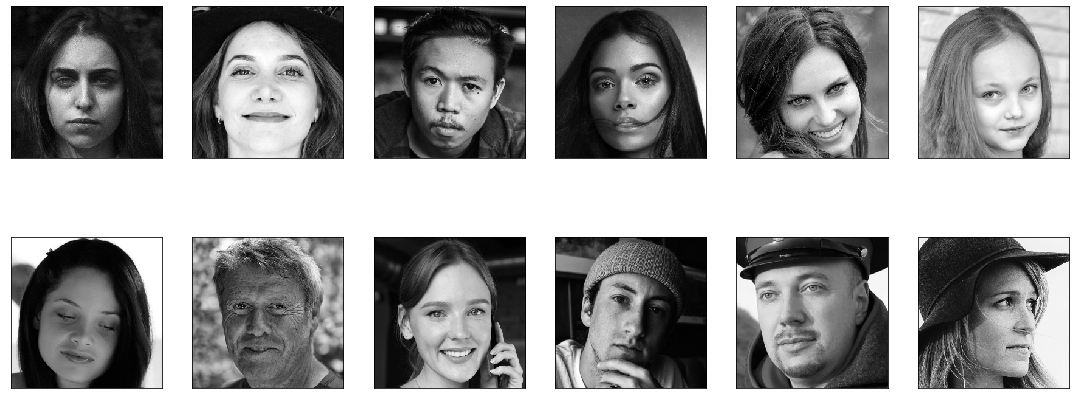

In [35]:
#show some real images of human faces
#from matplotlib import pyplot as plt

n_row=2
n_col=6
plt.figure(figsize=(2.5 * n_col, 3.1 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
real = 0
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[real].reshape((250, 250)), cmap=plt.cm.gray)
    real += 1
    plt.xticks(())
    plt.yticks(())

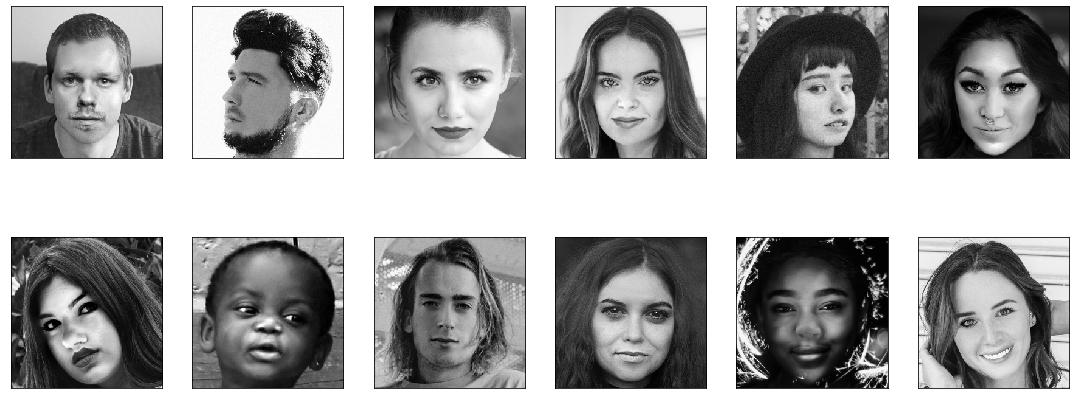

In [36]:
#show some fake images too        
n_row=2
n_col=6
plt.figure(figsize=(2.5 * n_col, 3.1 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
fake = 1500
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[fake].reshape((250, 250)), cmap=plt.cm.gray)
    fake += 1
    plt.xticks(())
    plt.yticks(())

## 3. Data Reduction

In [41]:
#linear reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=250)
pca.fit(images)
images_pca = pca.transform(images)

print('pca', pca.components_)

pca [[ 0.00602594  0.00605733  0.00605064 ...  0.00439332  0.00439426
   0.00439104]
 [ 0.0038695   0.00390341  0.00394531 ... -0.000756   -0.00076405
  -0.00074698]
 [-0.00341253 -0.00342718 -0.00350735 ...  0.00407524  0.00403306
   0.00394819]
 ...
 [-0.00080631 -0.00041722 -0.00138589 ... -0.00652567 -0.00479191
  -0.00526925]
 [-0.00829501 -0.00666379 -0.00711532 ...  0.00517278  0.00425841
   0.00397687]
 [-0.00476105 -0.00643692 -0.00501932 ... -0.00324205  0.00193177
   0.00153511]]


In [42]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
    
plot_explained_variance(pca)

## 4. Exceptional Work

## References

FaceFirst. "21 Amazing Uses for Face Recognition - Facial Recognition Use Cases". https://www.facefirst.com/blog/amazing-uses-for-face-recognition-facial-recognition-use-cases/